#Texture Matching using Local Binary Patterns

Import the required modules.

In [2]:
%pylab inline --no-import-all
# Utility package -- use pip install cvutils to install
import cvutils
# OpenCV bindings
import cv2
# To performing path manipulations 
import os
# Local Binary Pattern function
from skimage.feature import local_binary_pattern
# To calculate a normalized histogram 
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
# To read class from file
import csv

Populating the interactive namespace from numpy and matplotlib


C:\Users\admin\Anaconda\lib\site-packages\scipy\ndimage\morphology.py:212: RuntimeWarning: invalid value encountered in less_equal
  return numpy.asarray(output <= connectivity, dtype=bool)


Get the training set.

In [4]:
# Store the path of training images in train_images
train_images = cvutils.imlist("dataset/shirt")
# Dictionary containing image paths as keys and corresponding label as value
train_dic = {}
'''
with open('../dataset/class_train.txt', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        train_dic[row[0]] = int(row[1])
'''

"\nwith open('../dataset/class_train.txt', 'rb') as csvfile:\n    reader = csv.reader(csvfile, delimiter=' ')\n    for row in reader:\n        train_dic[row[0]] = int(row[1])\n"

Calculate the normalized LBP histograms for the training images.

C:\Users\admin\Anaconda\lib\site-packages\matplotlib\transforms.py:1026: RuntimeWarning: invalid value encountered in not_equal
  if np.any(self._points != other.get_points()):
C:\Users\admin\Anaconda\lib\site-packages\matplotlib\transforms.py:1611: RuntimeWarning: invalid value encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())


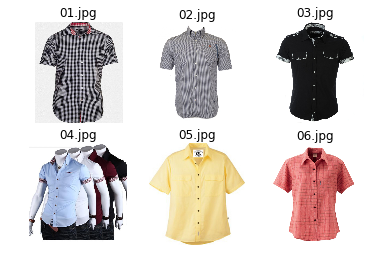

In [6]:
# List for storing the LBP Histograms, address of images and the corresponding label 
X_test = []
X_name = []
y_test = []

# For each image in the training set calculate the LBP histogram
# and update X_test, X_name and y_test
for train_image in train_images:
    # Read the image
    im = cv2.imread(train_image)
    # Convert to grayscale as LBP works on grayscale image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    radius = 3
    # Number of points to be considered as neighbourers 
    no_points = 8 * radius
    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
    # Calculate the histogram
    x = itemfreq(lbp.ravel())
    # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1])
    # Append image path in X_name
    X_name.append(train_image)
    # Append histogram to X_name
    X_test.append(hist)
    # Append class label in y_test
    #y_test.append(train_dic[os.path.split(train_image)[1]])
    
# Display the testing images
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols)
for row in range(nrows):
    for col in range(ncols):
        axes[row][col].imshow(cv2.cvtColor(cv2.imread(X_name[row*ncols+col]), cv2.COLOR_BGR2RGB))
        axes[row][col].axis('off')
        axes[row][col].set_title("{}".format(os.path.split(X_name[row*ncols+col])[1]))

Get the paths of the testing images.

In [9]:
# Store the path of training images in test_images
test_images = cvutils.imlist("dataset/7.jpg")
# Dictionary containing image paths as keys and corresponding label as value
test_dic = {}
'''
with open('../data/lbp/class_test.txt', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        test_dic[row[0]] = int(row[1])
        '''

WindowsError: [Error 267] The directory name is invalid: 'dataset/7.jpg/*.*'

Read the testing images and for each image display the best 2 results. We compare the LBP Histograms of both the training images (calculated above) and testing images (calculated below) using Chi-Squared distance. We then sort the results based on the Chi-Squared distance and display the results in sorted order. 

In [10]:
for test_image in test_images:
     # Read the image
    im = cv2.imread("dataset/7.jpg")
    # Convert to grayscale as LBP works on grayscale image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    radius = 3
    # Number of points to be considered as neighbourers 
    no_points = 8 * radius
    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
    # Calculate the histogram
    x = itemfreq(lbp.ravel())
    # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1])
    # Display the query image
    cvutils.imshow("** Query Image -> {}**".format(test_image), im)
    results = []
    # For each image in the training dataset
    # Calculate the chi-squared distance and the sort the values
    for index, x in enumerate(X_test):
        score = cv2.compareHist(np.array(x, dtype=np.float32), np.array(hist, dtype=np.float32), cv2.cv.CV_COMP_CHISQR)
        results.append((X_name[index], round(score, 3)))
    results = sorted(results, key=lambda score: score[1])
    # Display the results
    nrows = 2
    ncols = 3
    fig, axes = plt.subplots(nrows,ncols)
    fig.suptitle("** Scores for -> {}**".format(test_image))
    for row in range(nrows):
        for col in range(ncols):
            axes[row][col].imshow(cv2.cvtColor(cv2.imread(results[row*ncols+col][0]), cv2.COLOR_BGR2RGB))
            axes[row][col].axis('off')
            axes[row][col].set_title("Score {}".format(results[row*ncols+col][1]))

NameError: name 'test_images' is not defined